In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
import pyspark.sql.types as typ
from pyspark.sql.functions import col
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
originalData = pd.read_csv('CMC original.csv')
columns = ['wifeage','wifeedu','husbedu','chilno','wifereli','wifework','husboccu',
           'livstd','medexpo','cm']
originalData.columns = columns

In [3]:
originalData.head()

,wifeage,wifeedu,husbedu,chilno,wifereli,wifework,husboccu,livstd,medexpo,cm
0,24,2,3,3,1,1.0,2,3,0.0,1
1,45,1,3,10,1,1.0,3,4,0.0,1
2,43,2,3,7,1,1.0,3,4,0.0,1
3,42,3,2,9,1,1.0,3,3,0.0,1
4,36,3,3,8,1,1.0,3,2,0.0,1


In [4]:
originalData.describe()

,wifeage,wifeedu,husbedu,chilno,wifereli,wifework,husboccu,livstd,medexpo,cm
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1471.000000,1473.000000,1473.000000,1467.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.435845,0.850645,0.749830,2.137814,3.133741,0.074301,1.919891
std,8.227245,1.014994,0.816349,4.574280,0.356559,0.433258,0.864857,0.976161,0.262350,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.500000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,101.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [5]:
missing_data = originalData.isna().values
missing_data = list (np.sum(missing_data, axis=0))
missing_data = pd.DataFrame([missing_data], columns = [i + ' : missing values' for i in originalData.columns])
missing_data

,wifeage : missing values,wifeedu : missing values,husbedu : missing values,chilno : missing values,wifereli : missing values,wifework : missing values,husboccu : missing values,livstd : missing values,medexpo : missing values,cm : missing values
0,0,0,0,0,0,2,0,0,6,0


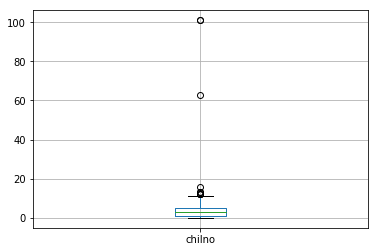

In [6]:
_ = originalData.boxplot(column='chilno')

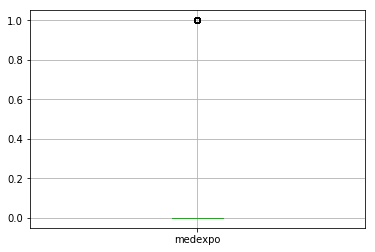

In [7]:
_ = originalData.boxplot(column='medexpo')

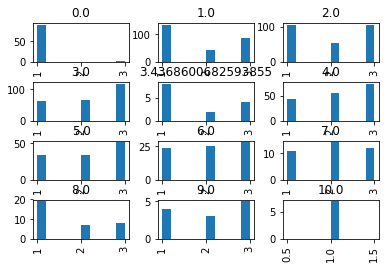

In [60]:
_ = originalData.hist(column='cm',by='chilno')

Text(0.5,1,'WifeEdu vs HusbEdu vs CM')

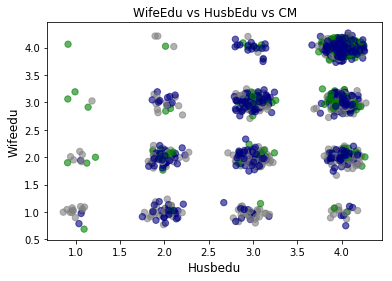

In [50]:
x = originalData['husbedu'].values + np.random.randn(len(originalData)) * 0.1
y = originalData['wifeedu'].values + np.random.randn(len(originalData)) * 0.1
s = originalData['cm'].values
sMap = {1:'gray',2:'green',3:'navy'}
cs = [sMap[i] for i in s]
plt.scatter(x,y,s=40,c=cs,alpha=0.6)
plt.xlabel('Husbedu',fontsize=12)
plt.ylabel('Wifeedu',fontsize=12)
plt.title('WifeEdu vs HusbEdu vs CM')

0/1 ratio：92/7


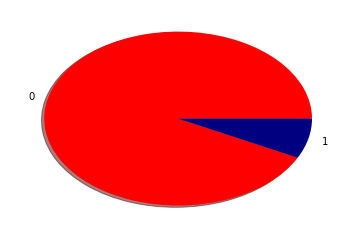

In [9]:
medexpo = originalData['medexpo'].values
medexpo = [i for i in medexpo if not np.isnan(i)]
medexpo_0  = sum(np.array(medexpo) == 0)
medexpo_1 = sum(np.array(medexpo) == 1)
print('0/1 ratio：%d/%d'%(int(medexpo_0*100/(medexpo_0+medexpo_1)),int(medexpo_1*100/(medexpo_0+medexpo_1))))
_ = plt.pie([medexpo_0,medexpo_1],colors=['r','navy'],labels=['0','1'],shadow=True)

In [10]:
originalData = originalData.dropna()

In [11]:
missing_data = originalData.isna().values
missing_data = list (np.sum(missing_data, axis=0))
missing_data = pd.DataFrame([missing_data], columns = [i + ' : missing values' for i in originalData.columns])
missing_data

,wifeage : missing values,wifeedu : missing values,husbedu : missing values,chilno : missing values,wifereli : missing values,wifework : missing values,husboccu : missing values,livstd : missing values,medexpo : missing values,cm : missing values
0,0,0,0,0,0,0,0,0,0,0


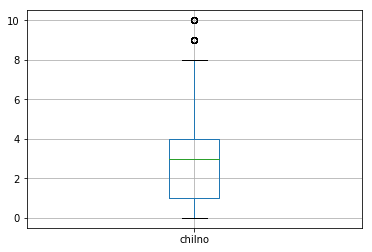

In [12]:
#replace extremes with mean
meanChilNo = np.mean(originalData['chilno'].values)
chilnoArray = originalData['chilno'].values
max99 = np.sort(chilnoArray)[int(len(chilnoArray)*0.99)]
chilnoArray = np.array([i if i < max99 else meanChilNo for i in chilnoArray])
originalData['chilno'] = chilnoArray
originalData.describe()
_ = originalData.boxplot(column='chilno')

In [13]:
subset = originalData[originalData['wifeage'] <= 45]
subset.describe()

,wifeage,wifeedu,husbedu,chilno,wifereli,wifework,husboccu,livstd,medexpo,cm
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,31.216036,2.988864,3.458055,3.010480,0.850780,0.747587,2.164811,3.118782,0.066815,1.963623
std,7.234253,0.986850,0.781653,2.061557,0.356438,0.434558,0.859961,0.975554,0.249794,0.877834
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,25.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,31.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,37.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,45.000000,4.000000,4.000000,10.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [14]:
originalData = subset
cm_1 = []
for item in originalData['cm'].values:
    if item == 1:
        cm_1.append(0)
    elif item == 2:
        cm_1.append(1)
    elif item == 3:
        cm_1.append(1)
    else:
        raise ValueError('Error')
originalData['cm_1'] = cm_1
originalData.head()

,wifeage,wifeedu,husbedu,chilno,wifereli,wifework,husboccu,livstd,medexpo,cm,cm_1
0,24,2,3,3.0,1,1.0,2,3,0.0,1,0
1,45,1,3,10.0,1,1.0,3,4,0.0,1,0
2,43,2,3,7.0,1,1.0,3,4,0.0,1,0
3,42,3,2,9.0,1,1.0,3,3,0.0,1,0
4,36,3,3,8.0,1,1.0,3,2,0.0,1,0


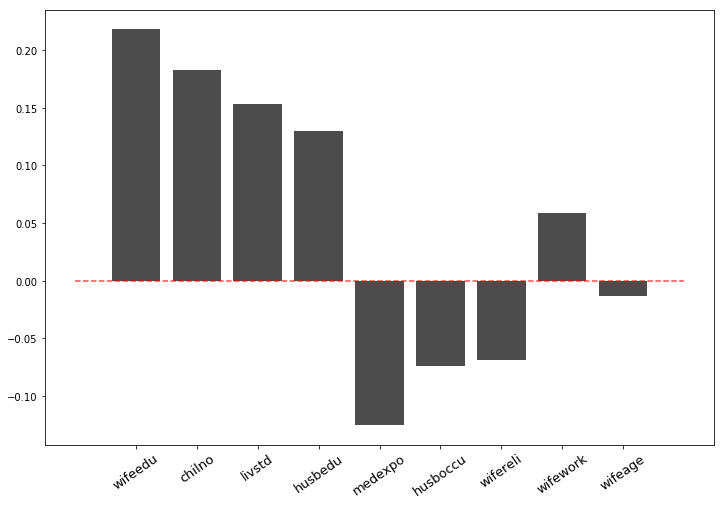

In [15]:
corrs = []
targetColumn_1 = originalData['cm_1'].values
for c in columns[:-1]:
    testColumn = originalData[c].values
    corr_1 = np.corrcoef(testColumn,targetColumn_1)[0,1]
    corrs.append(corr_1)
corrsSUM = [np.abs(i) for i in corrs]
corrs = np.array(corrs)[np.argsort(corrsSUM)[::-1]]
columnsS = np.array(columns[:-1])[np.argsort(corrsSUM)[::-1]]
xs = range(0,len(corrs))
figure = plt.figure(figsize=(12,8))
ax = figure.add_subplot(111)
_ = plt.bar(xs,corrs.flatten(),color='black',alpha=0.7)
_ = plt.xticks(xs,columnsS,rotation=35,fontsize=13)
_ = plt.plot([-1,9],[0,0],ls='--',color='r',alpha=0.7,lw=1.5)

In [16]:
modifiedData = originalData
husboccu = modifiedData['husboccu'].values
husboccu_1 = []
husboccu_2 = []
husboccu_3 = []
for item in husboccu:
    if item == 1:
        husboccu_1.append(1)
        husboccu_2.append(0)
        husboccu_3.append(0)
    elif item == 2:
        husboccu_1.append(0)
        husboccu_2.append(1)
        husboccu_3.append(0)
    elif item == 3:
        husboccu_1.append(0)
        husboccu_2.append(0)
        husboccu_3.append(1)
    else:
        husboccu_1.append(0)
        husboccu_2.append(0)
        husboccu_3.append(0)
modifiedData['husboccu_1'] = husboccu_1
modifiedData['husboccu_2'] = husboccu_2
modifiedData['husboccu_3'] = husboccu_3
#del modifiedData['husboccu']
modifiedData.head()

,wifeage,wifeedu,husbedu,chilno,wifereli,wifework,husboccu,livstd,medexpo,cm,cm_1,husboccu_1,husboccu_2,husboccu_3
0,24,2,3,3.0,1,1.0,2,3,0.0,1,0,0,1,0
1,45,1,3,10.0,1,1.0,3,4,0.0,1,0,0,0,1
2,43,2,3,7.0,1,1.0,3,4,0.0,1,0,0,0,1
3,42,3,2,9.0,1,1.0,3,3,0.0,1,0,0,0,1
4,36,3,3,8.0,1,1.0,3,2,0.0,1,0,0,0,1


In [17]:
modifiedData = modifiedData[['husboccu_1','husboccu_2',
                             'husboccu_3','wifeage','wifeedu','chilno','livstd','husbedu','cm_1']]
modifiedData.to_csv('modifiedData.csv',index=False)
modifiedData.head()

,husboccu_1,husboccu_2,husboccu_3,wifeage,wifeedu,chilno,livstd,husbedu,cm_1
0,0,1,0,24,2,3.0,3,3,0
1,0,0,1,45,1,10.0,4,3,0
2,0,0,1,43,2,7.0,4,3,0
3,0,0,1,42,3,9.0,3,2,0
4,0,0,1,36,3,8.0,2,3,0


In [18]:
spark = SparkSession.builder.master('local').appName('Test_2').getOrCreate()
labels = ['husboccu_1','husboccu_2','husboccu_3','wifeage','wifeedu','chilno','livstd','husbedu','cm_1']
schema = typ.StructType([
    typ.StructField(e,typ.FloatType(),False) for e in labels
]
)
dataFrame = spark.read.csv('modifiedData.csv',header=True,schema=schema)
dataFrame.take(5)

[Row(husboccu_1=0.0, husboccu_2=1.0, husboccu_3=0.0, wifeage=24.0, wifeedu=2.0, chilno=3.0, livstd=3.0, husbedu=3.0, cm_1=0.0),
 Row(husboccu_1=0.0, husboccu_2=0.0, husboccu_3=1.0, wifeage=45.0, wifeedu=1.0, chilno=10.0, livstd=4.0, husbedu=3.0, cm_1=0.0),
 Row(husboccu_1=0.0, husboccu_2=0.0, husboccu_3=1.0, wifeage=43.0, wifeedu=2.0, chilno=7.0, livstd=4.0, husbedu=3.0, cm_1=0.0),
 Row(husboccu_1=0.0, husboccu_2=0.0, husboccu_3=1.0, wifeage=42.0, wifeedu=3.0, chilno=9.0, livstd=3.0, husbedu=2.0, cm_1=0.0),
 Row(husboccu_1=0.0, husboccu_2=0.0, husboccu_3=1.0, wifeage=36.0, wifeedu=3.0, chilno=8.0, livstd=2.0, husbedu=3.0, cm_1=0.0)]

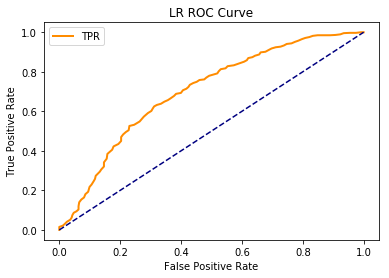

In [19]:
import pyspark.ml.classification as cl
import pyspark.ml.feature as ft
from pyspark.ml import Pipeline
import pyspark.ml.evaluation as ev

featuresCreator = ft.VectorAssembler(inputCols=['husboccu_1','husboccu_2','husboccu_3','wifeage','wifeedu',
                                                'chilno','livstd','husbedu'],outputCol='features')
logistic = cl.LogisticRegression(maxIter=10,regParam=0.01,labelCol='cm_1')
pipeline = Pipeline(stages=[featuresCreator,logistic])
dataFrame_train,dataFrame_test = dataFrame.randomSplit([0.8,0.2],seed=555)
model = pipeline.fit(dataFrame_train)
test_model = model.transform(dataFrame_test)

ROC = model.stages[1].summary
ROC = ROC.roc.toPandas()
fpr,tpr = ROC['FPR'], ROC['TPR']
plt.plot(fpr,tpr,color='darkorange',lw=2)
_ = plt.plot([0,1],[0,1],color='navy',lw=1.5,linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LR ROC Curve')
plt.legend()
plt.show()

In [20]:
test_model.show()

+----------+----------+----------+-------+-------+------+------+-------+----+--------------------+--------------------+--------------------+----------+
|husboccu_1|husboccu_2|husboccu_3|wifeage|wifeedu|chilno|livstd|husbedu|cm_1|            features|       rawPrediction|         probability|prediction|
+----------+----------+----------+-------+-------+------+------+-------+----+--------------------+--------------------+--------------------+----------+
|       0.0|       0.0|       0.0|   21.0|    2.0|   0.0|   4.0|    2.0| 1.0|(8,[3,4,6,7],[21....|[-0.2799824692358...|[0.43045807396640...|       1.0|
|       0.0|       0.0|       0.0|   30.0|    1.0|   4.0|   1.0|    2.0| 0.0|[0.0,0.0,0.0,30.0...|[0.20402450292579...|[0.55082992739849...|       0.0|
|       0.0|       0.0|       0.0|   35.0|    1.0|   0.0|   4.0|    2.0| 0.0|(8,[3,4,6,7],[35....|[0.90330722415196...|[0.71162866376392...|       0.0|
|       0.0|       0.0|       0.0|   35.0|    1.0|   4.0|   4.0|    2.0| 1.0|[0.0,0.0,0.

In [65]:

evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability',
                    labelCol='cm_1')
print('Logistic Classification Model ROC Score：%.3f'%evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderROC'}))
print('Logistic Classification Model PR Score：%.3f'%evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderPR'}))
test_model.createOrReplaceTempView('dataFrame_testView')
outcome = spark.sql("SELECT cm_1,probability FROM dataFrame_testView")
outcome = outcome.collect()
temp = []
for item in outcome:
    temp.append([item['cm_1'],item['probability'][1]])
temp = np.array(temp)
outcome

Logistic Classification Model ROC Score：0.715
Logistic Classification Model PR Score：0.763


[Row(cm_1=1.0, probability=DenseVector([1.0, 0.0])),
 Row(cm_1=0.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=0.0, probability=DenseVector([1.0, 0.0])),
 Row(cm_1=1.0, probability=DenseVector([0.4456, 0.5544])),
 Row(cm_1=1.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=0.0, probability=DenseVector([0.4456, 0.5544])),
 Row(cm_1=1.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=0.0, probability=DenseVector([0.8, 0.2])),
 Row(cm_1=0.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=1.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=0.0, probability=DenseVector([0.4485, 0.5515])),
 Row(cm_1=0.0, probability=DenseVector([1.0, 0.0])),
 Row(cm_1=1.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=1.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=0.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=1.0, probability=DenseVector([0.6, 0.4])),
 Row(cm_1=1.0, probability=DenseVector([0.4456, 0.5544])),
 Row(cm_1=0.0, probability=DenseVector([0.4456, 0.5544])),
 Row(cm_1=0.0, p

In [23]:
RF = cl.RandomForestClassifier(numTrees=10,maxDepth=3,labelCol='cm_1')
pipeline = Pipeline(stages=[featuresCreator,RF])
model = pipeline.fit(dataFrame_train)
test_model = model.transform(dataFrame_test)
evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability',
                    labelCol='cm_1')
print('Random Forest Classifier Model ROC Score:%.2f'%evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderROC'}))
print('Random Forest Classifier Model PR Score：%.2f'%evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderPR'}))
test_model.createOrReplaceTempView('dataFrame_testView')
outcome = spark.sql("SELECT cm_1,probability FROM dataFrame_testView")
outcome = outcome.collect()
temp = []
for item in outcome:
    temp.append([item['cm_1'],item['probability'][1]])
temp = np.array(temp)
outcome
test_model.show(10)

Random Forest Classifier Model ROC Score:0.71
Random Forest Classifier Model PR Score：0.77
+----------+----------+----------+-------+-------+------+------+-------+----+--------------------+--------------------+--------------------+----------+
|husboccu_1|husboccu_2|husboccu_3|wifeage|wifeedu|chilno|livstd|husbedu|cm_1|            features|       rawPrediction|         probability|prediction|
+----------+----------+----------+-------+-------+------+------+-------+----+--------------------+--------------------+--------------------+----------+
|       0.0|       0.0|       0.0|   21.0|    2.0|   0.0|   4.0|    2.0| 1.0|(8,[3,4,6,7],[21....|[7.92148091470090...|[0.79214809147009...|       0.0|
|       0.0|       0.0|       0.0|   30.0|    1.0|   4.0|   1.0|    2.0| 0.0|[0.0,0.0,0.0,30.0...|[4.81536235605970...|[0.48153623560597...|       1.0|
|       0.0|       0.0|       0.0|   35.0|    1.0|   0.0|   4.0|    2.0| 0.0|(8,[3,4,6,7],[35....|[7.92148091470090...|[0.79214809147009...|       0.

In [62]:
DT = cl.DecisionTreeClassifier(maxDepth=4,labelCol='cm_1')
pipeline = Pipeline(stages=[featuresCreator,DT])
model = pipeline.fit(dataFrame_train)
test_model = model.transform(dataFrame_test)
evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability',
                    labelCol='cm_1')
print('Decision Tree Classifier Model ROC Score：%.2f'%evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderROC'}))
print('Decision Tree Classifier Model PR Score：%.2f'%evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderPR'}))
test_model.createOrReplaceTempView('dataFrame_testView')
outcome = spark.sql("SELECT cm_1,probability FROM dataFrame_testView")
outcome = outcome.collect()
temp = []
for item in outcome:
    temp.append([item['cm_1'],item['probability'][1]])
temp = np.array(temp)
test_model.head(10)

Decision Tree Classifier Model ROC Score：0.72
Decision Tree Classifier Model PR Score：0.76


[Row(husboccu_1=0.0, husboccu_2=0.0, husboccu_3=0.0, wifeage=21.0, wifeedu=2.0, chilno=0.0, livstd=4.0, husbedu=2.0, cm_1=1.0, features=SparseVector(6, {3: 2.0, 5: 4.0}), rawPrediction=DenseVector([9.0, 0.0]), probability=DenseVector([1.0, 0.0]), prediction=0.0),
 Row(husboccu_1=0.0, husboccu_2=0.0, husboccu_3=0.0, wifeage=30.0, wifeedu=1.0, chilno=4.0, livstd=1.0, husbedu=2.0, cm_1=0.0, features=DenseVector([0.0, 0.0, 0.0, 1.0, 4.0, 1.0]), rawPrediction=DenseVector([75.0, 50.0]), probability=DenseVector([0.6, 0.4]), prediction=0.0),
 Row(husboccu_1=0.0, husboccu_2=0.0, husboccu_3=0.0, wifeage=35.0, wifeedu=1.0, chilno=0.0, livstd=4.0, husbedu=2.0, cm_1=0.0, features=SparseVector(6, {3: 1.0, 5: 4.0}), rawPrediction=DenseVector([9.0, 0.0]), probability=DenseVector([1.0, 0.0]), prediction=0.0),
 Row(husboccu_1=0.0, husboccu_2=0.0, husboccu_3=0.0, wifeage=35.0, wifeedu=1.0, chilno=4.0, livstd=4.0, husbedu=2.0, cm_1=1.0, features=DenseVector([0.0, 0.0, 0.0, 1.0, 4.0, 4.0]), rawPrediction=D

In [61]:
import pyspark.ml.tuning as tune
logistic = cl.LogisticRegression(labelCol='cm_1')
grid = tune.ParamGridBuilder().addGrid(logistic.maxIter,[2,10,50]).addGrid(logistic.regParam,[0.01,0.05,0.2]).addGrid(logistic.elasticNetParam,[0.1,0.8,1])\
        .build()
evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability',labelCol='cm_1')
cv = tune.CrossValidator(estimator=logistic,estimatorParamMaps=grid,
                        evaluator=evaluator)
pipeline = Pipeline(stages=[featuresCreator])
data_transformer = pipeline.fit(dataFrame_train)
cvModel = cv.fit(data_transformer.transform(dataFrame_train))
results = cvModel.transform(data_transformer.transform(dataFrame_test))
print('Logistic Classification Model ROC Score：%.3f'%evaluator.evaluate(results,{evaluator.metricName:'areaUnderROC'}))
print('Logistic Classification Model PR Score：%.3f'%evaluator.evaluate(results,{evaluator.metricName:'areaUnderPR'}))
results.createOrReplaceTempView('dataFrame_testView')
outcome = spark.sql("SELECT cm_1,probability FROM dataFrame_testView")
outcome = outcome.collect()
temp = []
for item in outcome:
    temp.append([item['cm_1'],item['probability'][1]])
temp = np.array(temp)
results.show()

Logistic Classification Model ROC Score：0.725
Logistic Classification Model PR Score：0.790
+----------+----------+----------+-------+-------+------+------+-------+----+--------------------+--------------------+--------------------+----------+
|husboccu_1|husboccu_2|husboccu_3|wifeage|wifeedu|chilno|livstd|husbedu|cm_1|            features|       rawPrediction|         probability|prediction|
+----------+----------+----------+-------+-------+------+------+-------+----+--------------------+--------------------+--------------------+----------+
|       0.0|       0.0|       0.0|   21.0|    2.0|   0.0|   4.0|    2.0| 1.0| (6,[3,5],[2.0,4.0])|[0.31620874792722...|[0.57840001812070...|       0.0|
|       0.0|       0.0|       0.0|   30.0|    1.0|   4.0|   1.0|    2.0| 0.0|[0.0,0.0,0.0,1.0,...|[0.46849349382603...|[0.61502712465937...|       0.0|
|       0.0|       0.0|       0.0|   35.0|    1.0|   0.0|   4.0|    2.0| 0.0| (6,[3,5],[1.0,4.0])|[0.78916658032728...|[0.68765235121056...|       0.

In [37]:
bestModel = cvModel.bestModel
print('After the hyperparameter screening, the optimal model parameter estimation result is：\n',bestModel.coefficientMatrix)
print('After the hyperparameter screening, the intercept result of the optimal model is:',bestModel.interceptVector[0])

After the hyperparameter screening, the optimal model parameter estimation result is：
 DenseMatrix([[-0.38905153, -0.42489204, -0.42556526, -0.05334575,  0.44029766,
               0.30360687,  0.24736297,  0.00046823]])
After the hyperparameter screening, the intercept result of the optimal model is: -0.5054447651312767


In [40]:
featuresCreator = ft.VectorAssembler(inputCols=['husboccu_1','husboccu_2','husboccu_3','wifeage','wifeedu',
                                                'chilno','livstd'],outputCol='features')
logistic = cl.LogisticRegression(maxIter=10,regParam=0.01,labelCol='cm_1')
pipeline = Pipeline(stages=[featuresCreator,logistic])
dataFrame_train,dataFrame_test = dataFrame.randomSplit([0.8,0.2],seed=555)
model = pipeline.fit(dataFrame_train)
test_model = model.transform(dataFrame_test)
evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability',
                    labelCol='cm_1')
print('Logistic Regression Model（husbedu Removed）ROC Score：%.3f'\
          %evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderROC'}))
print('Logistic Regression Model（husbedu Removed）PR Score：%.3f'\
          %evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderPR'}))
test_model.createOrReplaceTempView('dataFrame_testView')
outcome = spark.sql("SELECT cm_1,probability FROM dataFrame_testView")
outcome = outcome.collect()
temp = []
for item in outcome:
    temp.append([item['cm_1'],item['probability'][1]])
temp = np.array(temp)

Logistic Regression Model（husbedu Removed）ROC Score：0.753
Logistic Regression Model（husbedu Removed）PR Score：0.787


In [45]:
featuresCreator = ft.VectorAssembler(inputCols=['husboccu_1','husboccu_2','husboccu_3','wifeedu',
                                                'chilno','livstd'],outputCol='features')
logistic = cl.LogisticRegression(maxIter=10,regParam=0.01,labelCol='cm_1')
pipeline = Pipeline(stages=[featuresCreator,logistic])
dataFrame_train,dataFrame_test = dataFrame.randomSplit([0.8,0.2],seed=555)
model = pipeline.fit(dataFrame_train)
test_model = model.transform(dataFrame_test)
evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability',
                    labelCol='cm_1')
print('Logistic Regression Model(wifeage Removed)ROC Score：%.3f'\
          %evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderROC'}))
print('Logistic Regression Model(wifeage Removed)PR Score：%.3f'\
          %evaluator.evaluate(test_model,{evaluator.metricName:'areaUnderPR'}))
test_model.createOrReplaceTempView('dataFrame_testView')
outcome = spark.sql("SELECT cm_1,probability FROM dataFrame_testView")
outcome = outcome.collect()
temp = []
for item in outcome:
    temp.append([item['cm_1'],item['probability'][1]])
temp = np.array(temp)

Logistic Regression Model(wifeage Removed)ROC Score：0.717
Logistic Regression Model(wifeage Removed)PR Score：0.789
